# Heart disease Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../datasets/HeartDisease/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing data
df.dropna(inplace=True)


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Map categorical values to labels
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})
df['target'] = df['target'].map({0: 'No Disease', 1: 'Disease'})
df['cp'] = df['cp'].map({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'})


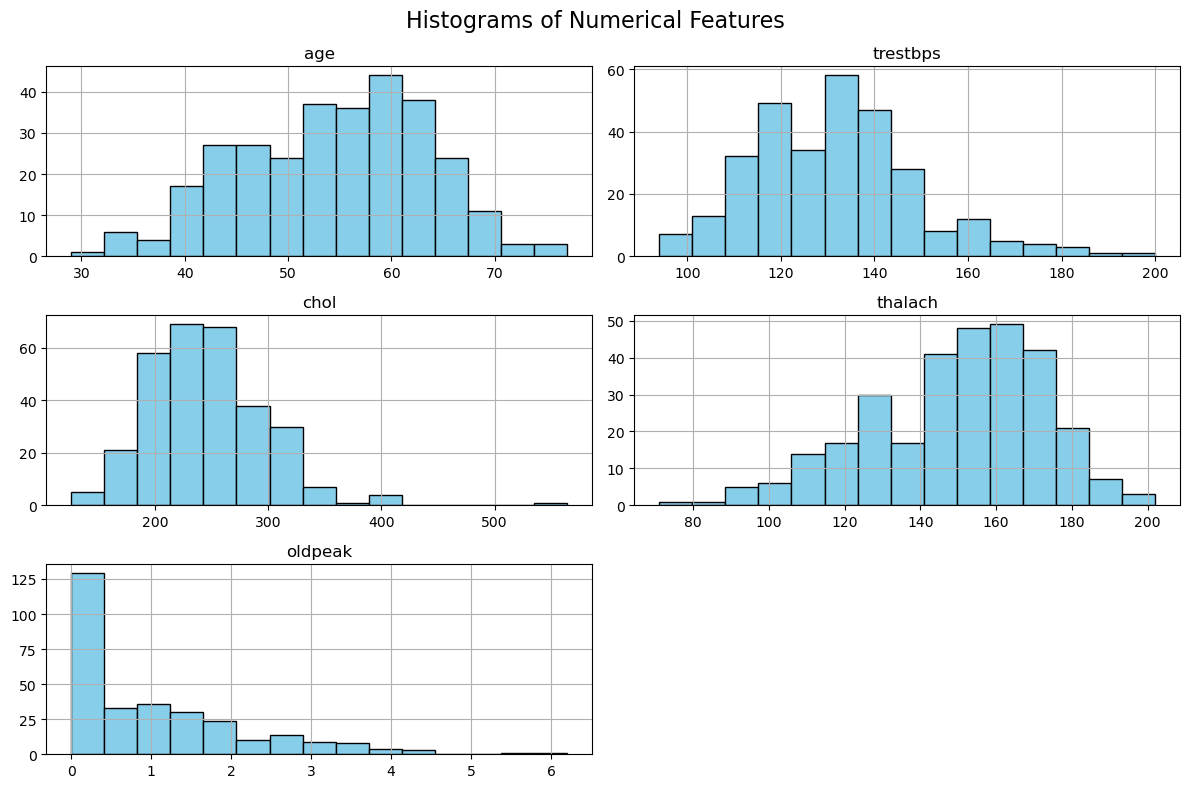

In [5]:
# Histograms of numerical features (X -> range, Y-> Frequency)
# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()



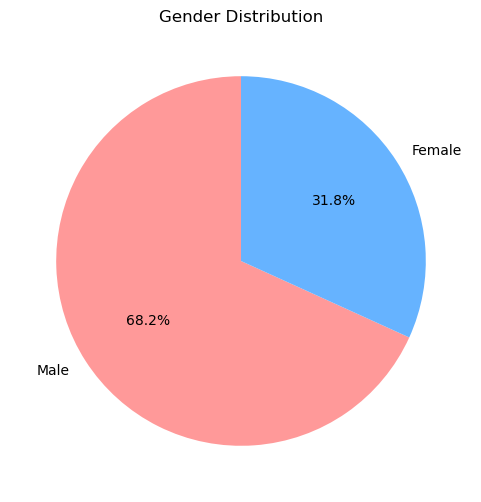

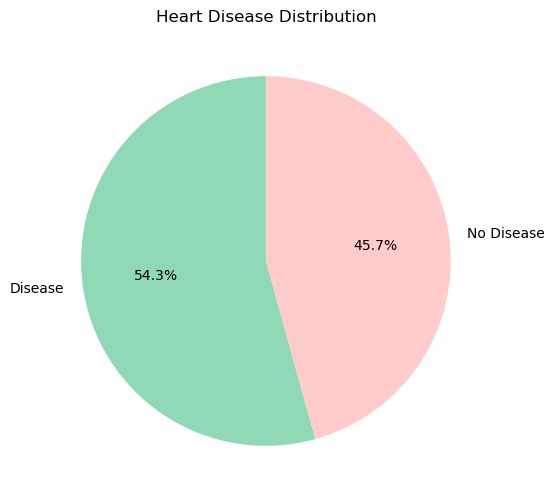

In [6]:
# Pie chart: Gender distribution
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Pie chart: Heart disease distribution
plt.figure(figsize=(6, 6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#8fd9b6', '#ffcccb'])
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33004\3045612914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='age', palette='Set2')


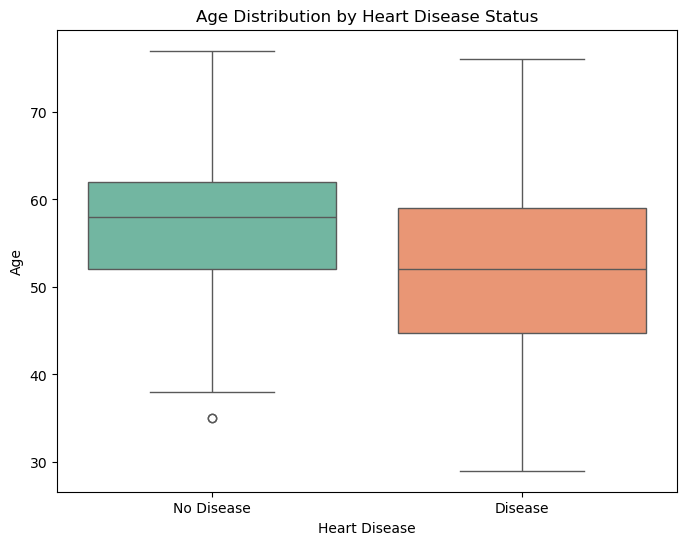

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33004\3045612914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='chol', palette='Set2')


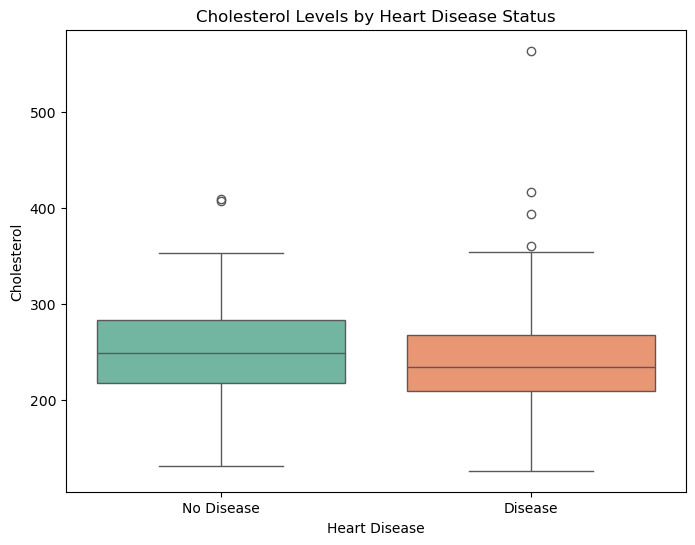

In [10]:
# Box plot: Age vs Heart Disease
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='age', palette='Set2')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

# Box plot: Cholesterol vs Heart Disease
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='chol', palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()


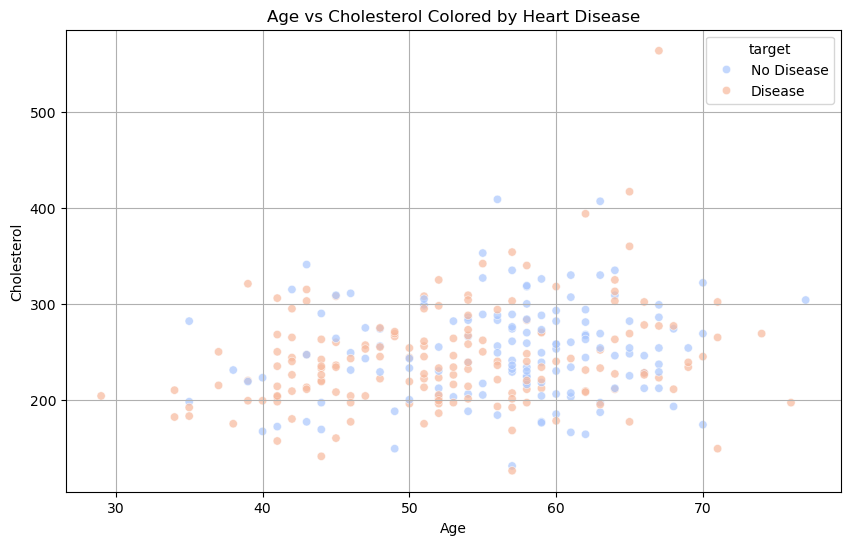

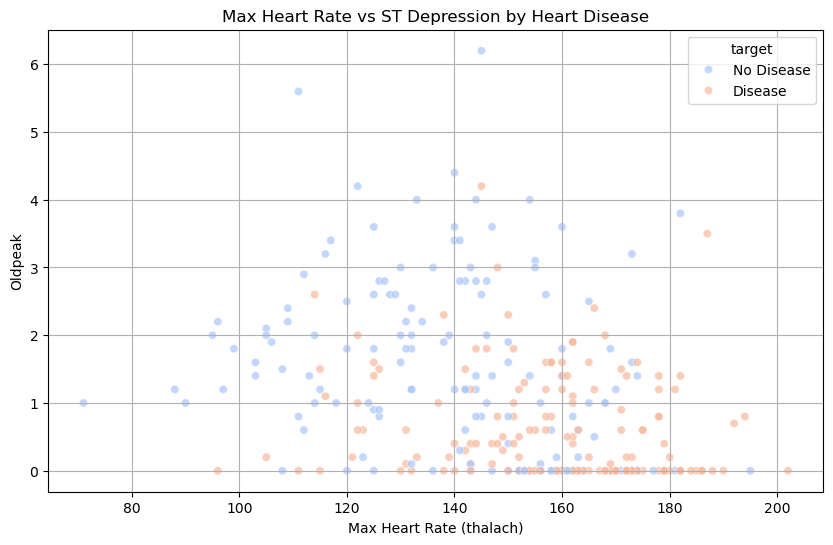

In [11]:
# Scatter plot: Age vs Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='coolwarm', alpha=0.7)
plt.title('Age vs Cholesterol Colored by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

# Scatter plot: Maximum Heart Rate vs Oldpeak
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='thalach', y='oldpeak', hue='target', palette='coolwarm', alpha=0.7)
plt.title('Max Heart Rate vs ST Depression by Heart Disease')
plt.xlabel('Max Heart Rate (thalach)')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()


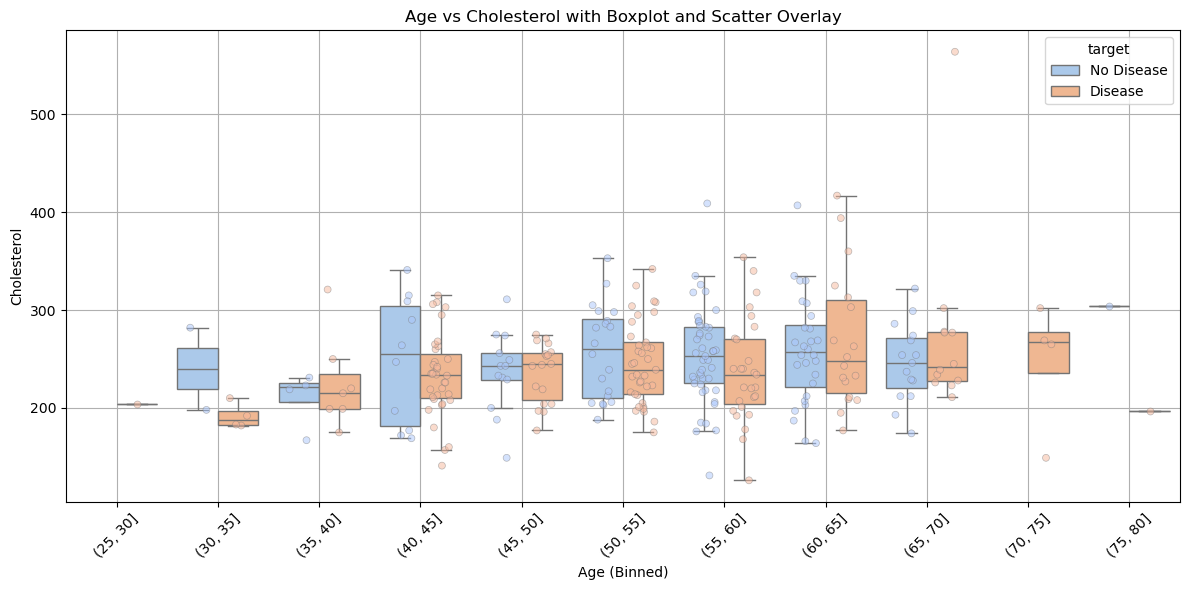

In [15]:
# Bin age and plot
df['age_bin'] = pd.cut(df['age'], bins=np.arange(25, 85, 5))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_bin', y='chol', hue='target', palette='pastel', showfliers=False)
sns.stripplot(data=df, x='age_bin', y='chol', hue='target', dodge=True, jitter=0.25,
              palette='coolwarm', alpha=0.5, linewidth=0.5, marker='o', legend=False)

plt.title('Age vs Cholesterol with Boxplot and Scatter Overlay')
plt.xlabel('Age (Binned)')
plt.ylabel('Cholesterol')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
